<a href="https://colab.research.google.com/github/livitskatetyana/data-science-a-b-test/blob/main/ab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Data/ab_data.csv")

In [22]:
print("Data size:", df.shape)
print("Unique users:", df["user_id"].nunique())

Data size: (294480, 5)
Unique users: 290585


In [23]:
df = df.query(" (group == 'treatment' and landing_page == 'new_page') \
              or (group == 'control' and landing_page == 'old_page') ")

In [24]:
df = df.drop_duplicates(subset="user_id", keep="first")

In [25]:
print("Data size:", df.shape)
print("Unique users:", df["user_id"].nunique())

Data size: (290585, 5)
Unique users: 290585


In [26]:
print(df["group"].value_counts())

group
treatment    145311
control      145274
Name: count, dtype: int64


In [27]:
df.to_csv("ab_data_clean.csv", index=False)

In [28]:
import matplotlib.pyplot as plt

In [29]:
print(df["group"].value_counts())

group
treatment    145311
control      145274
Name: count, dtype: int64


In [30]:
conversion_rates = df.groupby("group")["converted"].mean()
print("\nAvg conversion:")
print(conversion_rates)


Avg conversion:
group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64


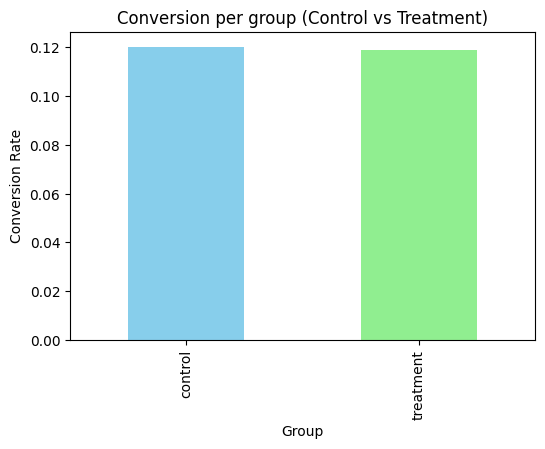

In [31]:
conversion_rates.plot(kind="bar", color=["skyblue", "lightgreen"], figsize=(6,4))
plt.title("Conversion per group (Control vs Treatment)")
plt.ylabel("Conversion Rate")
plt.xlabel("Group")
plt.show()

In [43]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

successes = [df[df['group']=='control']['converted'].sum(),
             df[df['group']=='treatment']['converted'].sum()]

nobs = [df[df['group']=='control'].shape[0],
        df[df['group']=='treatment'].shape[0]]

z_stat, p_val = proportions_ztest(successes, nobs)
print(f"z-statistic = {z_stat:.4f}, p-value = {p_val:.4f}")

z-statistic = 1.3116, p-value = 0.1897


In [50]:
confint_control = proportion_confint(successes[0], nobs[0], alpha=0.05, method='normal')
confint_treatment = proportion_confint(successes[1], nobs[1], alpha=0.05, method='normal')
print(f"CI Control: {confint_control}")
print(f"CI Treatment: {confint_treatment}")
ci_lower = [conv_rates[0]-confint_control[0], conv_rates[1]-confint_treatment[0]]
ci_upper = [confint_control[1]-conv_rates[0], confint_treatment[1]-conv_rates[1]]
print(f"CI Lower: {ci_lower}")
print(f"CI Treatment: {ci_upper}")

CI Control: (0.11871294722381814, 0.12205966177710426)
CI Treatment: (0.11714362162601945, 0.12047087417952866)
CI Lower: [np.float64(0.001673357276643056), np.float64(0.0016636262767546067)]
CI Treatment: [np.float64(0.001673357276643056), np.float64(0.0016636262767546067)]


In [46]:
if p_val < 0.05:
    print("We reject H0: there is a statistically significant difference between the groups")
else:
    print("We do not reject H0: there is no evidence of a statistically significant difference")

We do not reject H0: there is no evidence of a statistically significant difference


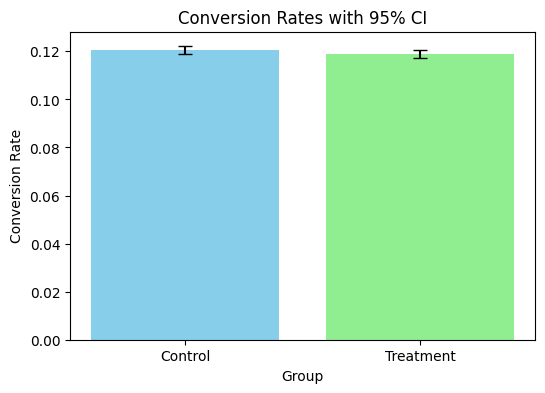

In [51]:
plt.figure(figsize=(6,4))
plt.bar(['Control','Treatment'], conv_rates, yerr=[ci_lower, ci_upper],
        color=['skyblue','lightgreen'], capsize=5)
plt.ylabel("Conversion Rate")
plt.xlabel("Group")
plt.title("Conversion Rates with 95% CI")
plt.show()

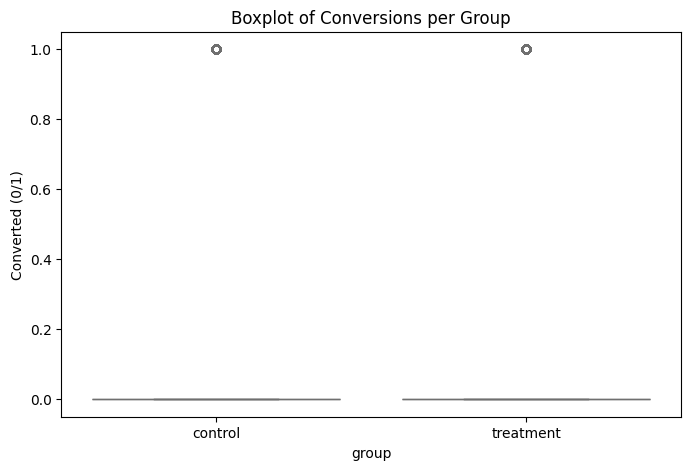

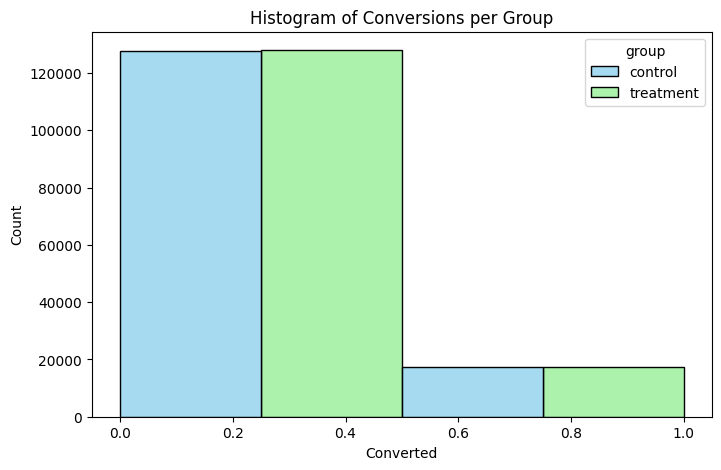

In [54]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='group', y='converted', data=df, hue='group',
            palette=['skyblue','lightgreen'], dodge=False, legend=False)
plt.title("Boxplot of Conversions per Group")
plt.ylabel("Converted (0/1)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='converted', hue='group', multiple='dodge', bins=2,
             palette=['skyblue','lightgreen'])
plt.title("Histogram of Conversions per Group")
plt.xlabel("Converted")
plt.ylabel("Count")
plt.show()

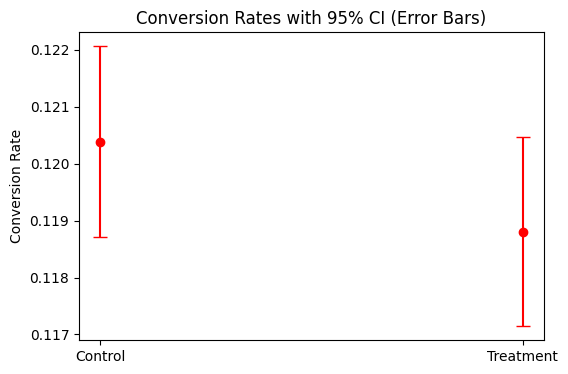

In [55]:
plt.figure(figsize=(6,4))
plt.errorbar(['Control','Treatment'], conv_rates,
             yerr=[ci_lower, ci_upper], fmt='o', color='red', capsize=5)
plt.ylabel("Conversion Rate")
plt.title("Conversion Rates with 95% CI (Error Bars)")
plt.show()

In [48]:
conv_rates = [successes[0]/nobs[0], successes[1]/nobs[1]]
print(f"AVG Convertion: {conv_rates}")

AVG Convertion: [np.float64(0.1203863045004612), np.float64(0.11880724790277405)]
